# PROJEKT MODELU KLASYFIKACYJNEGO PRZEWIDYWANIA STANU MIESZKAŃ NA PODSTAWIE #

## Extra Trees Classifier ##

### kwiecień 2025

In [1]:
import pandas as pd
from pycaret.classification import setup, pull, compare_models, plot_model
from sklearn.feature_extraction.text import CountVectorizer
import pymysql
from sqlalchemy import create_engine
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# tą komórkę uruchom jeżeli bazę danych bierzesz np. z DBeaver, oracle developer itp.

#username = 'root'
#password = '1234'
#host = '127.0.0.1'
#port = 3306  
#database = 'projekt1'
#engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

#df = pd.read_sql("SELECT * FROM saleflats", con=engine)

#engine.dispose()

In [3]:
# tę komórkę uruchom jeśli czerpiesz dane z pliku .csv
df = pd.read_csv('sale_2024_0.csv', sep=',')

In [4]:
df

,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,...,Archive,Location,VoivodeshipNumber,CountyNumber,CommunityNumber,KindNumber,RegionNumber,SubRegionNumber,StreetNumber,EncryptedId
0,88,NaN,14,Mieszkanie trzypokojowe na sprzedaż,Mieszkanie o powierzchni 73m2 znajduje się na ...,73.00,766500.0,NaN,NaN,NaN,...,NaN,"Podlaskie, Białystok, Bojary",20.0,61.0,1.0,1.0,922490.0,NaN,NaN,02TgImo1wm-Ra4zUQxoPBw==
1,99,NaN,19,Sprzedam mieszkanie na parterze 64.8m2 Białyst...,Sprzedam mieszkanie na parterze 64.8m2 w 3-pię...,64.80,540000.0,NaN,NaN,NaN,...,NaN,"Podlaskie, Białystok, Antoniuk",20.0,61.0,1.0,1.0,922426.0,NaN,NaN,D-NUdVbtN3_kIW7ExgXkvA==
2,115,NaN,3,"Mieszkanie bezczynszowe, 3 pokoje, 2 łazienki",SPRZEDAŻ WYŁĄCZNIE BEZPOŚREDNIA. Agencjom nier...,51.00,540000.0,NaN,NaN,NaN,...,NaN,"Podlaskie, Białystok, Bagnówka",20.0,61.0,1.0,1.0,922461.0,NaN,NaN,lmBSU1XiXLSLOq1yKSe2kA==
3,140,NaN,14,Mieszkanie trzypokojowe na sprzedaż,***Oferta bez prowizji biura i podatku PCC!***...,67.62,544000.0,NaN,NaN,NaN,...,NaN,"Podlaskie, Białystok, Ul. Józefa Karola Puchal...",20.0,61.0,1.0,1.0,922410.0,NaN,43141.0,HWachf5gb6Vq-sFYH4YWnA==
4,145,NaN,3,3 Pokoje- 48M2-Osiedle Dziesięciny,Przedstawiamy na sprzedaż 3 pokojowe mieszkani...,48.00,459000.0,NaN,NaN,NaN,...,NaN,"Podlaskie, Białystok, Ul. Dziesięciny",20.0,61.0,1.0,1.0,922410.0,NaN,4656.0,AWsmt4ZY0X7lNv-6fSCn9Q==
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133882,4418401,NaN,2,Mieszkanie na sprzedaż - 59 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,59.99,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYftiMRU9ErLfA6XOKdBw9jY=
1133883,4418402,NaN,2,Mieszkanie na sprzedaż - 41 m² - 2 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,41.23,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYa7D8z7yjun2jGP_aZIReN8=
1133884,4418404,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.09,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYf9eM73_U8S05NBjfLiez6E=
1133885,4418405,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.48,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYRXVZdKE7iJxxFPu0Bq0ikc=


In [5]:
# pobranie próbki 10 losowych wierszy
df.sample(10)

,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,...,Archive,Location,VoivodeshipNumber,CountyNumber,CommunityNumber,KindNumber,RegionNumber,SubRegionNumber,StreetNumber,EncryptedId
747317,3481960,NaN,3,"2 pokoje, Gotowe! Bezpośrednio, taniej o 180 tys",Brak prowizji Brak podatku PCC Oferta sprzedaż...,38.17,676210.0,NaN,NaN,NaN,...,NaN,"Małopolskie, Kraków, Kraków-podgórze, Dębniki",12.0,61.0,4.0,9.0,951020.0,NaN,NaN,pLSp3F22EiaXhy8GwN0uozMbFhDt8yVDGT6Er2r0AmA=
60085,357060,NaN,11,"Mieszkanie, Sosnowiec, Zagórze, 65 m²","Mieszkanie, Sosnowiec, Zagórze, 65 m² Ogłoszen...",64.74,553527.0,NaN,NaN,NaN,...,NaN,"Śląskie, Sosnowiec",24.0,75.0,1.0,1.0,943428.0,NaN,NaN,aQf2jrSjtYTJv5gt5OPXfqqEhWzKrHJDlJ5H3ZyQS80=
1029699,4219693,NaN,17,"Mieszkanie, ul. Żytnia",OKAZJA! 3-pokojowe mieszkanie w centrum Białeg...,46.00,412000.0,470000.0,523000.00,NaN,...,NaN,"Podlaskie, Białystok, Ul. Żytnia",20.0,61.0,1.0,1.0,922410.0,NaN,26635.0,Ma5x4fNEYtqU3xTjI2TzfkLWB3gJBEE3JSbYoi1MtPg=
1009969,4180282,NaN,4,2-pokojowe mieszkanie na sprzedaż,Mieszkanie jest do sprzedaży 39 m. kw. lub zam...,39.00,299000.0,NaN,NaN,NaN,...,NaN,"Podkarpackie, Stalowowolski, Stalowa Wola, Ale...",18.0,18.0,1.0,1.0,981133.0,NaN,35344.0,fbmrZKPi7nPmhwVyiiLnPqi_rC3KFy_RnfS0EWfIRU4=
836996,3729737,NaN,17,"Mieszkanie, ul. Rakowicka",Na sprzedaż widokowy apartament w inwestycji N...,46.34,1228010.0,NaN,NaN,NaN,...,NaN,"Małopolskie, Kraków, Kraków-śródmieście, Ul. R...",12.0,61.0,5.0,9.0,951327.0,NaN,18426.0,iPRdOe9s2pMBIAf5bvwA2FsBl2chVeLJOWFXdp_Irxg=
1093583,4348960,NaN,2,Mieszkanie na sprzedaż - 86 m² - 4 pokoje Wroc...,Parkowe Aleje – etap III Twoje idealne miejsce...,86.21,944194.0,1028297.0,1599000.00,NaN,...,NaN,"Dolnośląskie, Wrocław, Wrocław-krzyki, Brochów",2.0,64.0,3.0,9.0,986580.0,NaN,NaN,WMHGbFQZeBq9I-4xyvluWDMbFhDt8yVDGT6Er2r0AmA=
910370,3920818,NaN,19,Mieszkanie Łódź Bałuty,Mieszkanie od osoby prywatnej bez pośredników....,37.00,290000.0,NaN,NaN,310000.0,...,NaN,"Łódzkie, Łódź, Łódź-bałuty, Bałuty",10.0,61.0,2.0,9.0,957689.0,NaN,NaN,B5bqPQSGqYjVTIQ6NHiaU3FOzG-tLiUN4h2uz30zJ98=
467791,2824884,NaN,24,Dywizjonu 303 | mieszkanie 2-pok. | 2.2.8,"Przestronne mieszkanie 2-pok. 46,85 m2 Słonecz...",46.85,490800.6,NaN,NaN,NaN,...,NaN,"Pomorskie, Gdański, Pruszcz Gdański, Ul. Dywiz...",22.0,4.0,1.0,1.0,934620.0,NaN,4561.0,Oo_nG9rMTwyeGjYUeh3ckI4lcJSA8OB9lFvDEJq2Tpw=
175419,1259162,NaN,14,Mieszkanie dwupokojowe na sprzedaż,Mam przyjemność przedstawić Państwu stabilną i...,72.76,750000.0,NaN,NaN,NaN,...,NaN,"Kujawsko-pomorskie, Toruń",4.0,63.0,1.0,1.0,982724.0,NaN,NaN,XpDeIfISBETzr0SuIbOanZShIpC99iUkqTPiCKTTxVM=
899170,3890252,NaN,3,Green View || Mieszkanie 0A3 || Parter z ogódkiem,2-pokojowe mieszkanie numer 0A3 o powierzchni ...,66.19,780000.0,630000.0,802333.33,819000.0,...,NaN,"Dolnośląskie, Trzebnicki, Trzebnica, Ul. Święt...",2.0,20.0,3.0,4.0,987383.0,NaN,22548.0,L34KRFs9gQiJhH9b51gxsADdKxtGNfzGFAfeT2xucQg=


In [6]:
print(df.columns)

Index(['SaleId', 'OriginalId', 'PortalId', 'Title', 'Description', 'Area',
       'Price', 'OfferPrice', 'RealPriceAfterRenovation', 'OriginalPrice',
       'PricePerSquareMeter', 'NumberOfRooms', 'BuiltYear', 'Type',
       'BuildingType', 'BuildingCondition', 'OfferFrom', 'Floor', 'Floors',
       'TypeOfMarket', 'OwnerType', 'DateAddedToDatabase', 'DateAdded',
       'DateLastModification', 'DateLastRaises', 'NewestDate', 'AvailableFrom',
       'Link', 'Phone', 'MainImage', 'OtherImages', 'NumberOfDuplicates',
       'NumberOfRaises', 'NumberOfModifications', 'IsDuplicatePriceLower',
       'IsDuplicatePrivateOwner', 'Score', 'ScorePrecision', 'CommunityScore',
       'NumberOfCommunityComments', 'NumberOfCommunityOpinions', 'Archive',
       'Location', 'VoivodeshipNumber', 'CountyNumber', 'CommunityNumber',
       'KindNumber', 'RegionNumber', 'SubRegionNumber', 'StreetNumber',
       'EncryptedId'],
      dtype='object')


In [7]:
df['BuiltYear'] = pd.to_datetime(df['BuiltYear'], format='%Y', errors='coerce')

In [8]:
df_a = df.dropna(subset=['Description'])

In [9]:
df_a.isnull().sum()

SaleId                             0
OriginalId                   1125223
PortalId                           0
Title                              0
Description                        0
Area                            2077
Price                          53212
OfferPrice                   1043154
RealPriceAfterRenovation     1043154
OriginalPrice                1015114
PricePerSquareMeter            56195
NumberOfRooms                  13525
BuiltYear                     379005
Type                               0
BuildingType                  202788
BuildingCondition            1048333
OfferFrom                       5030
Floor                          56904
Floors                        499074
TypeOfMarket                   31709
OwnerType                     540943
DateAddedToDatabase                0
DateAdded                          0
DateLastModification          880033
DateLastRaises                827954
NewestDate                         0
AvailableFrom                1125223
L

In [10]:
df_b = df_a.dropna(subset=['Location'])

In [11]:
df_b.isnull().sum()

SaleId                             0
OriginalId                   1124683
PortalId                           0
Title                              0
Description                        0
Area                            2071
Price                          53153
OfferPrice                   1042614
RealPriceAfterRenovation     1042614
OriginalPrice                1014574
PricePerSquareMeter            56133
NumberOfRooms                  13494
BuiltYear                     378808
Type                               0
BuildingType                  202543
BuildingCondition            1047795
OfferFrom                       5030
Floor                          56828
Floors                        498541
TypeOfMarket                   31629
OwnerType                     540441
DateAddedToDatabase                0
DateAdded                          0
DateLastModification          879543
DateLastRaises                827486
NewestDate                         0
AvailableFrom                1124683
L

In [12]:
df_c = df_b.dropna(subset=['BuildingCondition'])

In [13]:
df_c.isnull().sum()

SaleId                           0
OriginalId                   76888
PortalId                         0
Title                            0
Description                      0
Area                            30
Price                         7036
OfferPrice                   31258
RealPriceAfterRenovation     31258
OriginalPrice                73440
PricePerSquareMeter           7138
NumberOfRooms                  165
BuiltYear                    19248
Type                             0
BuildingType                 15600
BuildingCondition                0
OfferFrom                        0
Floor                         1984
Floors                       13600
TypeOfMarket                   716
OwnerType                    30525
DateAddedToDatabase              0
DateAdded                        0
DateLastModification         68857
DateLastRaises               68330
NewestDate                       0
AvailableFrom                76888
Link                             0
Phone               

In [14]:
df_c

,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,...,Archive,Location,VoivodeshipNumber,CountyNumber,CommunityNumber,KindNumber,RegionNumber,SubRegionNumber,StreetNumber,EncryptedId
1037441,4236909,NaN,10,Mieszkanie na sprzedaż - 56 m² - 3 pokoje Wars...,NAJBARDZIEJ ZIELONA DZIELNICA Białołęka ma now...,56.52,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Warszawa, Białołęka, Grodzisk, Ul...",14.0,65.0,3.0,8.0,919447.0,NaN,1051.0,YNwIfRAf_6pTlpT4SzWIF1I945vZrxCmGc1kx-MElW4=
1037442,4236910,NaN,10,Mieszkanie na sprzedaż - 39 m² - 3 pokoje Wars...,NAJBARDZIEJ ZIELONA DZIELNICA Białołęka ma now...,39.44,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Warszawa, Białołęka, Grodzisk, Ul...",14.0,65.0,3.0,8.0,919447.0,NaN,1051.0,YNwIfRAf_6pTlpT4SzWIF2b3MhONsWHx4CM5o0osslE=
1037444,4236917,NaN,10,Mieszkanie na sprzedaż - 57 m² - 4 pokoje Wars...,NAJBARDZIEJ ZIELONA DZIELNICA Białołęka ma now...,57.72,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Warszawa, Białołęka, Grodzisk, Ul...",14.0,65.0,3.0,8.0,919447.0,NaN,1051.0,YNwIfRAf_6pTlpT4SzWIF5P7_4V7ShzJmmF8PHTVfng=
1037449,4236925,NaN,10,Mieszkanie na sprzedaż - 34 m² - 2 pokoje Wars...,NAJBARDZIEJ ZIELONA DZIELNICA Białołęka ma now...,34.69,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Warszawa, Białołęka, Grodzisk, Ul...",14.0,65.0,3.0,8.0,919447.0,NaN,1051.0,YNwIfRAf_6pTlpT4SzWIF-baRshu3omO9IJePLIRnwA=
1037450,4236928,NaN,10,Mieszkanie na sprzedaż - 37 m² - 2 pokoje Wars...,NAJBARDZIEJ ZIELONA DZIELNICA Białołęka ma now...,37.03,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Warszawa, Białołęka, Grodzisk, Ul...",14.0,65.0,3.0,8.0,919447.0,NaN,1051.0,YNwIfRAf_6pTlpT4SzWIF4_bCM8lJ876moazm9h2OAo=
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133882,4418401,NaN,2,Mieszkanie na sprzedaż - 59 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,59.99,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYftiMRU9ErLfA6XOKdBw9jY=
1133883,4418402,NaN,2,Mieszkanie na sprzedaż - 41 m² - 2 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,41.23,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYa7D8z7yjun2jGP_aZIReN8=
1133884,4418404,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.09,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYf9eM73_U8S05NBjfLiez6E=
1133885,4418405,NaN,2,Mieszkanie na sprzedaż - 49 m² - 3 pokoje Grod...,Poznaj naszą inwestycję NA WSPÓLNEJ zlokalizow...,49.48,NaN,NaN,NaN,NaN,...,NaN,"Mazowieckie, Grodziski, Grodzisk Mazowiecki, W...",14.0,5.0,4.0,5.0,2594.0,NaN,24885.0,Ogpi4Jwj8KWDyT0rM_vFYRXVZdKE7iJxxFPu0Bq0ikc=


In [15]:
df_c['Description'] = df_c['Description'].str.slice(0, 300)

In [16]:
# Przygotuj wektorizer z limitem
vectorizer = CountVectorizer(max_features=500)  # np. 500 najczęstszych słów
X_bow = vectorizer.fit_transform(df_c["Description"])

# Konwertuj do DataFrame
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Dołącz do oryginalnych danych (z wyjątkiem kolumny Description)
df_c = df_c.drop(columns=['Description']).reset_index(drop=True)
df_bow = df_bow.reset_index(drop=True)
df_prepared = pd.concat([df_c, df_bow], axis=1)

In [17]:
exp = setup(
    data=df_prepared,
    target='BuildingCondition',
    session_id=1123,
    categorical_features=['BuildingType', 'Location'],
    keep_features=[            
             'Description', 
             'SaleId'],
    date_features=['BuiltYear'],
    ordinal_features={
        'BuildingType': ['Pozostałe', 'Blok', 'Apartametowiec', 'Kamienica']
    },
    verbose=False
)
exp.dataset_transformed.sample(10)

,SaleId,PortalId,Title,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,PricePerSquareMeter,NumberOfRooms,...,łazienka,łazienki,łodzi,łódź,łączy,śródmieście,świetna,świetnej,życia,BuildingCondition
3069,4244676.0,3.0,1-pokojowe mieszkanie 30m2 + balkon,30.090000,650857.502733,635122.556067,1.001286e+06,660128.153212,11855.934088,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
52769,4367347.0,17.0,"Mieszkanie, ul. Holenderska",46.509998,381382.000000,635122.556067,1.001286e+06,660128.153212,8200.000000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
53637,4368982.0,32.0,"Mieszkanie Gdańsk Stare Miasto, Ustronie Gdańsk",26.000000,264347.000000,267925.500000,3.738607e+05,660128.153212,10167.190430,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
57726,4378982.0,3.0,Lokal mieszkalny w domu wielorodzinnym,100.000000,299000.000000,635122.556067,1.001286e+06,660128.153212,2990.000000,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9160,4259339.0,3.0,Kalaminta | mieszkanie 2-pok. | 12_3,35.639999,339000.000000,335000.000000,3.463333e+05,660128.153212,9511.780273,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
24143,4297537.0,3.0,"✨Gotowe, 2 Pokoje, Po Remoncie, 0% Prowizji✨",33.500000,319900.000000,307700.000000,6.039900e+05,321600.000000,9600.000000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
60767,4386352.0,4.0,2-pokojowe mieszkanie na sprzedaż,37.000000,885000.000000,799000.000000,8.141917e+05,660128.153212,23918.919922,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
18523,4283164.0,3.0,2-pokojowe mieszkanie 38m2 + ogródek Bez Prowizji,38.939999,650857.502733,635122.556067,1.001286e+06,660128.153212,11855.934088,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
67771,4400927.0,10.0,Mieszkanie na sprzedaż - 37 m² - 2 pokoje Krak...,37.610001,650857.502733,635122.556067,1.001286e+06,660128.153212,11855.934088,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
55120,4372274.0,3.0,Mieszkanie 2-pokojowe z domkiem letniskowym.,47.000000,650000.000000,699500.000000,7.583330e+05,660128.153212,13829.790039,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
df_prepared.info

<bound method DataFrame.info of         SaleId  OriginalId  PortalId  \
0      4236909         NaN        10   
1      4236910         NaN        10   
2      4236917         NaN        10   
3      4236925         NaN        10   
4      4236928         NaN        10   
...        ...         ...       ...   
76883  4418401         NaN         2   
76884  4418402         NaN         2   
76885  4418404         NaN         2   
76886  4418405         NaN         2   
76887  4418406         NaN         2   

                                                   Title   Area  Price  \
0      Mieszkanie na sprzedaż - 56 m² - 3 pokoje Wars...  56.52    NaN   
1      Mieszkanie na sprzedaż - 39 m² - 3 pokoje Wars...  39.44    NaN   
2      Mieszkanie na sprzedaż - 57 m² - 4 pokoje Wars...  57.72    NaN   
3      Mieszkanie na sprzedaż - 34 m² - 2 pokoje Wars...  34.69    NaN   
4      Mieszkanie na sprzedaż - 37 m² - 2 pokoje Wars...  37.03    NaN   
...                                        

In [19]:
df_prepared[df_prepared.duplicated()]

,SaleId,OriginalId,PortalId,Title,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,PricePerSquareMeter,...,zł,łazienka,łazienki,łodzi,łódź,łączy,śródmieście,świetna,świetnej,życia


In [20]:
df_prepared.nunique()

SaleId         76888
OriginalId         0
PortalId          34
Title          56154
Area            8156
               ...  
łączy              3
śródmieście        3
świetna            3
świetnej           3
życia              3
Length: 550, dtype: int64

In [21]:
df_prepared.isnull()

,SaleId,OriginalId,PortalId,Title,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,PricePerSquareMeter,...,zł,łazienka,łazienki,łodzi,łódź,łączy,śródmieście,świetna,świetnej,życia
0,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76883,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
76884,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
76885,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
76886,False,True,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df_prepared.isnull().sum()

SaleId             0
OriginalId     76888
PortalId           0
Title              0
Area              30
               ...  
łączy              0
śródmieście        0
świetna            0
świetnej           0
życia              0
Length: 550, dtype: int64

In [23]:
Q1 = df_prepared["Price"].quantile(0.25)
Q3 = df_prepared["Price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_prep_p = df_prepared[~((df_prepared["Price"] < lower_bound) | (df_prepared["Price"] > upper_bound))]

In [24]:
Q1 = df_prep_p["PricePerSquareMeter"].quantile(0.25)
Q3 = df_prep_p["PricePerSquareMeter"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_prep_a = df_prep_p[~((df_prep_p["PricePerSquareMeter"] < lower_bound) | (df_prep_p["PricePerSquareMeter"] > upper_bound))]

In [25]:
Q1 = df_prep_a["Area"].quantile(0.25)
Q3 = df_prep_a["Area"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_prepared2 = df_prep_a[~((df_prep_a["Area"] < lower_bound) | (df_prep_a["Area"] > upper_bound))]

In [26]:
df_prepared2["BuildingCondition"].value_counts(normalize=True)

BuildingCondition
DEVELOPER_STATE     0.475638
AFTER_RENOVATION    0.349426
GOOD                0.087849
FOR_RENOVATION      0.087087
Name: proportion, dtype: float64

In [27]:
df_prepared2.nunique()

SaleId         69597
OriginalId         0
PortalId          34
Title          50634
Area            6522
               ...  
łączy              3
śródmieście        3
świetna            3
świetnej           3
życia              3
Length: 550, dtype: int64

In [28]:
unique_btype=df_prepared2['BuildingType'].unique()

unique_btype

array([nan, 'Apartamentowiec', 'Blok', 'Pozostałe', 'Kamienica'],
      dtype=object)

In [29]:
print(df_prepared2['BuildingCondition'].nunique())

4


In [30]:
unique_ctype=df_prepared2['BuildingCondition'].unique()

unique_ctype

array(['DEVELOPER_STATE', 'AFTER_RENOVATION', 'GOOD', 'FOR_RENOVATION'],
      dtype=object)

In [31]:
df_prepared2.isnull().sum()

SaleId             0
OriginalId     69597
PortalId           0
Title              0
Area              29
               ...  
łączy              0
śródmieście        0
świetna            0
świetnej           0
życia              0
Length: 550, dtype: int64

In [32]:
df_prepared3=df_prepared2.dropna(subset=['BuildingCondition'])

In [33]:
unbalanced_exp = setup(
    data=df_prepared3,
    target='BuildingCondition',
    session_id=1123,
    keep_features=[
            'Description', 
             'SaleId'],
    categorical_features=['BuildingType', 'Location'],
    date_features=['BuiltYear'],
    ordinal_features={
        'BuildingType': ['Pozostałe', 'Blok', 'Apartametowiec', 'Kamienica']
    },
    verbose=False,

    ignore_features=[
        'RealPriceAfterRenovation',
        'OfferPrice',
        'OriginalPrice',
        'PricePerSquareMeter',
        'OriginalId',
        'PortalId',
        'Title',
        'Type',
        'OfferFrom',
        'TypeOfMarket',
        'OwnerType',
        'DateAddedToDatabase',
        'DateAdded',
        'DateLastModification',
        'DateLastRaises',
        'NewestDate',
        'AvailableFrom',
        'Link',
        'Phone',
        'MainImage',
        'OtherImages',
        'NumberOfDuplicates',
        'NumberOfRaises',
        'NumberOfModifications',
        'IsDuplicatePriceLower',
        'IsDuplicatePrivateOwner',
        'Score',
        'ScorePrecision',
        'CommunityScore',
        'NumberOfCommunityComments',
        'NumberOfCommunityOpinions',
        'Archive',
        'VoivodeshipNumber',
        'CountyNumber',
        'CommunityNumber',
        'RegionNumber',
        'KindNumber',
        'SubRegionNumber',
        'StreetNumber',
        'EncryptedId',
        ],
         
       
)
best_unbalanced_model = unbalanced_exp.compare_models()
unbalanced_metrics_df = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8230,0.9390,0.8230,0.8194,0.8035,0.7105,0.7210,2.9040
rf,Random Forest Classifier,0.8110,0.9340,0.8110,0.7990,0.7910,0.6905,0.6984,2.0870
lightgbm,Light Gradient Boosting Machine,0.7883,0.9200,0.7883,0.7675,0.7723,0.6566,0.6601,1.6510
ridge,Ridge Classifier,0.7722,0.0000,0.7722,0.7510,0.7452,0.6230,0.6318,0.7460
lda,Linear Discriminant Analysis,0.7648,0.0000,0.7648,0.7625,0.7555,0.6210,0.6245,1.4280
gbc,Gradient Boosting Classifier,0.7575,0.0000,0.7575,0.7311,0.7383,0.6031,0.6069,14.7690
ada,Ada Boost Classifier,0.7396,0.0000,0.7396,0.7094,0.7189,0.5750,0.5786,2.2410
dt,Decision Tree Classifier,0.7173,0.7928,0.7173,0.7082,0.7123,0.5513,0.5516,1.4410
knn,K Neighbors Classifier,0.5314,0.6794,0.5314,0.5047,0.5082,0.2287,0.2338,2.2730
lr,Logistic Regression,0.5106,0.0000,0.5106,0.4414,0.3993,0.0974,0.1364,13.9480


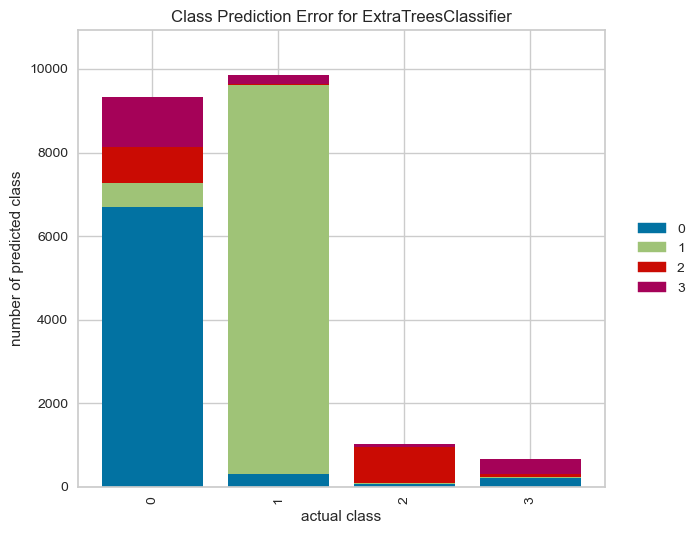

In [34]:
unbalanced_exp.plot_model(best_unbalanced_model, plot='error')

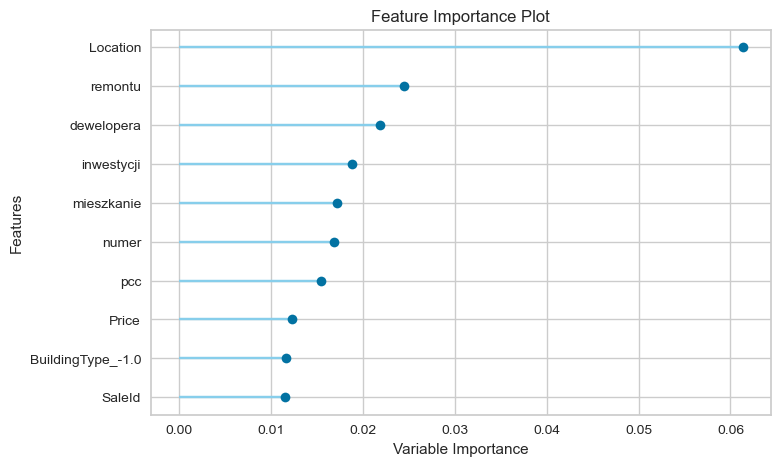

In [35]:
unbalanced_exp.plot_model(best_unbalanced_model, plot='feature')

In [36]:
tuned_model = unbalanced_exp.tune_model(best_unbalanced_model, n_iter=3, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6915,0.8967,0.6915,0.7188,0.6987,0.5311,0.5354
1,0.6775,0.8950,0.6775,0.7022,0.6827,0.5093,0.5143
2,0.6921,0.9003,0.6921,0.7191,0.6986,0.5321,0.5368
3,0.6975,0.9030,0.6975,0.7243,0.7041,0.5397,0.5444
4,0.6991,0.8972,0.6991,0.7183,0.7037,0.5392,0.5424
5,0.7034,0.9019,0.7034,0.7139,0.7045,0.5434,0.5457
6,0.6827,0.8971,0.6827,0.7095,0.6903,0.5174,0.5213
7,0.7003,0.9002,0.7003,0.7165,0.7040,0.5400,0.5426
8,0.6806,0.8948,0.6806,0.7070,0.6867,0.5153,0.5200


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [37]:
best_model = unbalanced_exp.compare_models([best_unbalanced_model, tuned_model])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.8230,0.9390,0.8230,0.8194,0.8035,0.7105,0.7210,2.9810
1,Extra Trees Classifier,0.8230,0.9390,0.8230,0.8194,0.8035,0.7105,0.7210,2.9530


In [38]:
unbalanced_exp.predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8260,0.9420,0.8260,0.8210,0.8079,0.7158,0.7251


,SaleId,Area,Price,NumberOfRooms,BuiltYear,BuildingType,Floor,Floors,Location,00,...,łodzi,łódź,łączy,śródmieście,świetna,świetnej,życia,BuildingCondition,prediction_label,prediction_score
32451,4318539,34.599998,385000.0,1.0,1980-01-01,Blok,0.0,10.0,"Pomorskie, Gdańsk, Chełm, Ul. Władysława Biega...",0,...,0,0,0,0,0,0,0,FOR_RENOVATION,FOR_RENOVATION,0.84
29003,4308661,82.110001,903210.0,4.0,2027-01-01,NaN,0.0,5.0,"Małopolskie, Kraków, Kraków-podgórze, Podgórze",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00
48217,4357423,63.000000,615000.0,3.0,1990-01-01,Blok,0.0,3.0,"Śląskie, Katowice, Śródmieście, Ul. Kolibrów",0,...,0,0,0,0,0,0,0,AFTER_RENOVATION,AFTER_RENOVATION,0.66
71146,4407560,59.000000,699999.0,2.0,NaT,Kamienica,4.0,6.0,"Wielkopolskie, Poznań, Poznań-stare Miasto",0,...,0,0,0,0,0,0,1,AFTER_RENOVATION,AFTER_RENOVATION,0.71
53672,4369020,60.500000,695750.0,3.0,2024-01-01,Apartamentowiec,2.0,NaN,"Małopolskie, Suski, Maków Podhalański",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60558,4385827,26.990000,NaN,1.0,2025-01-01,NaN,3.0,5.0,"Łódzkie, Łódź, Łódź-śródmieście, Śródmieście, ...",0,...,1,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00
28728,4307723,42.000000,420000.0,2.0,1985-01-01,Blok,3.0,3.0,"Mazowieckie, Nowodworski, Nowy Dwór Mazowiecki",0,...,0,0,0,0,0,0,0,FOR_RENOVATION,AFTER_RENOVATION,0.62
6015,4250741,38.669998,359631.0,2.0,2025-01-01,Blok,4.0,4.0,"Dolnośląskie, Oławski, Oława, Ul. Jodłowa",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00
25022,4298941,44.660000,NaN,2.0,NaT,Apartamentowiec,1.0,3.0,"Zachodniopomorskie, Gryficki, Trzebiatów, Rogowo",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00


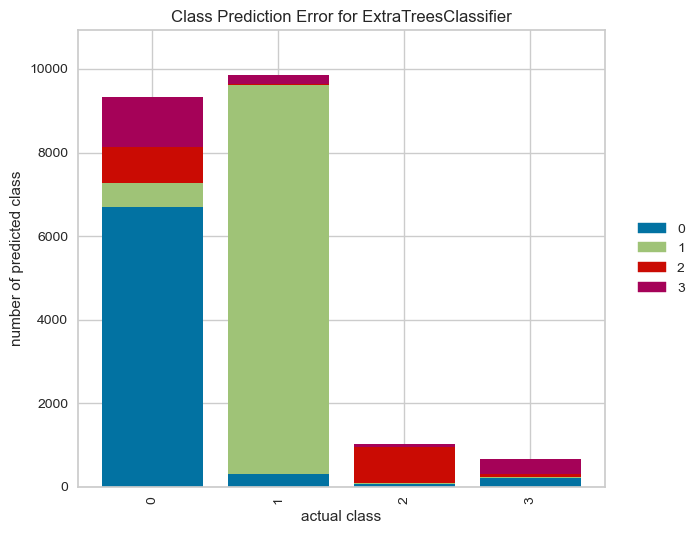

In [39]:
unbalanced_exp.plot_model(best_model, plot='error')

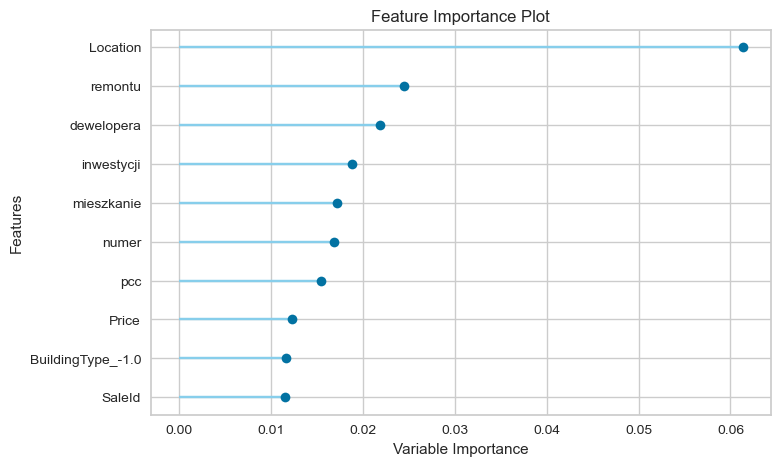

In [40]:
unbalanced_exp.plot_model(best_model, plot='feature')

In [41]:
best_tuned_model = unbalanced_exp.tune_model(
    best_model,
    optimize="F1",
    choose_better=True,
    fold=5,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6872,0.8967,0.6872,0.7070,0.6911,0.5219,0.5258
1,0.6954,0.9014,0.6954,0.7223,0.7018,0.5371,0.5419
2,0.6979,0.8983,0.6979,0.7180,0.7033,0.5384,0.5413
3,0.6918,0.8977,0.6918,0.7076,0.6954,0.5265,0.5292
4,0.6877,0.8979,0.6877,0.7080,0.6928,0.5231,0.5263
Mean,0.6920,0.8984,0.6920,0.7126,0.6969,0.5294,0.5329
Std,0.0042,0.0016,0.0042,0.0063,0.0048,0.0070,0.0072


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [42]:
unbalanced_exp.predict_model(best_tuned_model).head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8260,0.9420,0.8260,0.8210,0.8079,0.7158,0.7251


,SaleId,Area,Price,NumberOfRooms,BuiltYear,BuildingType,Floor,Floors,Location,00,...,łodzi,łódź,łączy,śródmieście,świetna,świetnej,życia,BuildingCondition,prediction_label,prediction_score
32451,4318539,34.599998,385000.0,1.0,1980-01-01,Blok,0.0,10.0,"Pomorskie, Gdańsk, Chełm, Ul. Władysława Biega...",0,...,0,0,0,0,0,0,0,FOR_RENOVATION,FOR_RENOVATION,0.84
29003,4308661,82.110001,903210.0,4.0,2027-01-01,NaN,0.0,5.0,"Małopolskie, Kraków, Kraków-podgórze, Podgórze",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00
48217,4357423,63.000000,615000.0,3.0,1990-01-01,Blok,0.0,3.0,"Śląskie, Katowice, Śródmieście, Ul. Kolibrów",0,...,0,0,0,0,0,0,0,AFTER_RENOVATION,AFTER_RENOVATION,0.66
71146,4407560,59.000000,699999.0,2.0,NaT,Kamienica,4.0,6.0,"Wielkopolskie, Poznań, Poznań-stare Miasto",0,...,0,0,0,0,0,0,1,AFTER_RENOVATION,AFTER_RENOVATION,0.71
53672,4369020,60.500000,695750.0,3.0,2024-01-01,Apartamentowiec,2.0,NaN,"Małopolskie, Suski, Maków Podhalański",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,0.99
24550,4298192,39.410000,589968.0,2.0,NaT,NaN,4.0,8.0,"Wielkopolskie, Poznań, Poznań-jeżyce, Ogrody",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00
66679,4398540,52.619999,NaN,3.0,2024-01-01,NaN,0.0,NaN,"Dolnośląskie, Wrocław, Wrocław-krzyki, Tarnoga...",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00
73821,4412909,38.500000,349000.0,2.0,1967-01-01,Blok,2.0,3.0,"Łódzkie, Łódź, Łódź-widzew, Widzew, Ul. Św. Ka...",0,...,1,0,0,0,0,0,0,AFTER_RENOVATION,AFTER_RENOVATION,0.62
13778,4273308,52.549999,599070.0,3.0,2025-01-01,Apartamentowiec,NaN,NaN,"Mazowieckie, Żyrardowski, Żyrardów, Ul. Stefan...",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,0.93
44104,4346798,52.000000,599000.0,3.0,1960-01-01,Blok,0.0,4.0,"Podkarpackie, Rzeszów, Ul. Stanisława Staszica",0,...,0,0,0,0,0,0,0,AFTER_RENOVATION,AFTER_RENOVATION,0.92


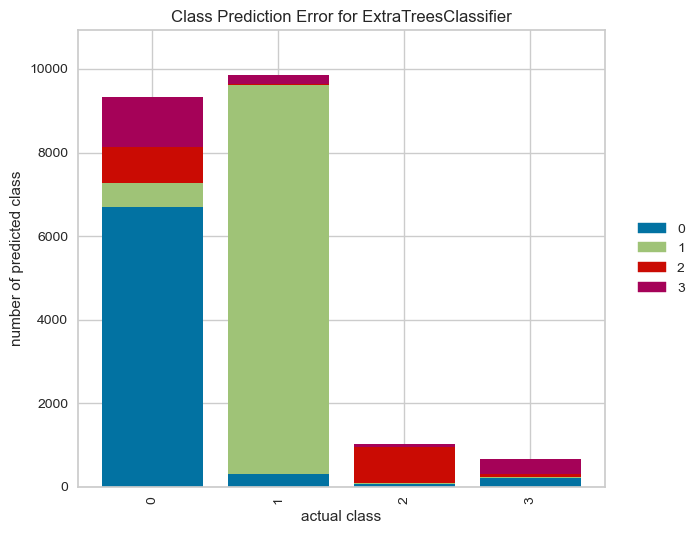

In [43]:
unbalanced_exp.plot_model(best_tuned_model, plot='error')

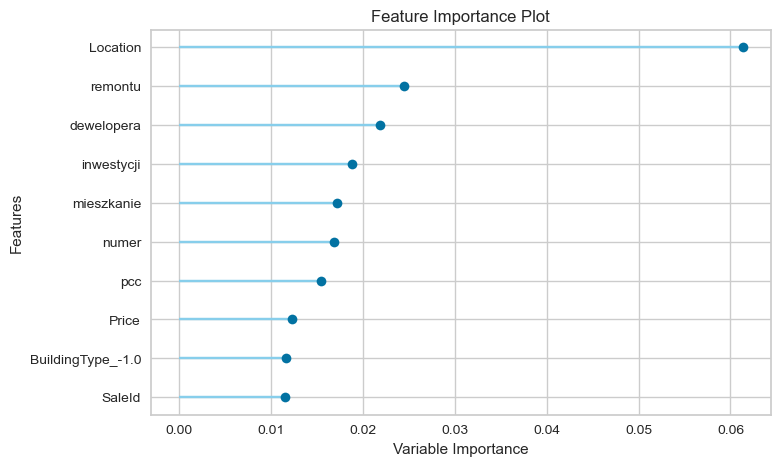

In [44]:
unbalanced_exp.plot_model(best_tuned_model, plot='feature')

In [45]:
best_final_model = unbalanced_exp.finalize_model(best_tuned_model)
best_final_model

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['BuiltYear'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=Non...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=1123, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [46]:
unbalanced_exp.save_model(best_final_model, "0_best_buildingCond_model", verbose=False);

In [47]:
unbalanced_exp.predict_model(best_final_model).head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9958,1.0000,0.9958,0.9958,0.9958,0.9934,0.9935


,SaleId,Area,Price,NumberOfRooms,BuiltYear,BuildingType,Floor,Floors,Location,00,...,łodzi,łódź,łączy,śródmieście,świetna,świetnej,życia,BuildingCondition,prediction_label,prediction_score
32451,4318539,34.599998,385000.0,1.0,1980-01-01,Blok,0.0,10.0,"Pomorskie, Gdańsk, Chełm, Ul. Władysława Biega...",0,...,0,0,0,0,0,0,0,FOR_RENOVATION,FOR_RENOVATION,0.91
29003,4308661,82.110001,903210.0,4.0,2027-01-01,NaN,0.0,5.0,"Małopolskie, Kraków, Kraków-podgórze, Podgórze",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00
48217,4357423,63.000000,615000.0,3.0,1990-01-01,Blok,0.0,3.0,"Śląskie, Katowice, Śródmieście, Ul. Kolibrów",0,...,0,0,0,0,0,0,0,AFTER_RENOVATION,AFTER_RENOVATION,0.85
71146,4407560,59.000000,699999.0,2.0,NaT,Kamienica,4.0,6.0,"Wielkopolskie, Poznań, Poznań-stare Miasto",0,...,0,0,0,0,0,0,1,AFTER_RENOVATION,AFTER_RENOVATION,0.99
53672,4369020,60.500000,695750.0,3.0,2024-01-01,Apartamentowiec,2.0,NaN,"Małopolskie, Suski, Maków Podhalański",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00
24550,4298192,39.410000,589968.0,2.0,NaT,NaN,4.0,8.0,"Wielkopolskie, Poznań, Poznań-jeżyce, Ogrody",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00
66679,4398540,52.619999,NaN,3.0,2024-01-01,NaN,0.0,NaN,"Dolnośląskie, Wrocław, Wrocław-krzyki, Tarnoga...",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00
73821,4412909,38.500000,349000.0,2.0,1967-01-01,Blok,2.0,3.0,"Łódzkie, Łódź, Łódź-widzew, Widzew, Ul. Św. Ka...",0,...,1,0,0,0,0,0,0,AFTER_RENOVATION,AFTER_RENOVATION,0.81
13778,4273308,52.549999,599070.0,3.0,2025-01-01,Apartamentowiec,NaN,NaN,"Mazowieckie, Żyrardowski, Żyrardów, Ul. Stefan...",0,...,0,0,0,0,0,0,0,DEVELOPER_STATE,DEVELOPER_STATE,1.00
44104,4346798,52.000000,599000.0,3.0,1960-01-01,Blok,0.0,4.0,"Podkarpackie, Rzeszów, Ul. Stanisława Staszica",0,...,0,0,0,0,0,0,0,AFTER_RENOVATION,AFTER_RENOVATION,0.92


In [48]:
predictions = unbalanced_exp.predict_model(best_final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9958,1.0000,0.9958,0.9958,0.9958,0.9934,0.9935


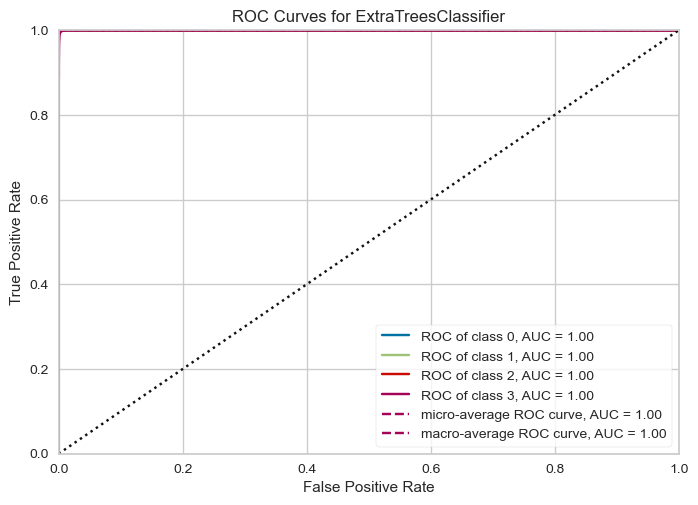

In [49]:
plot_model(best_final_model, plot="auc")

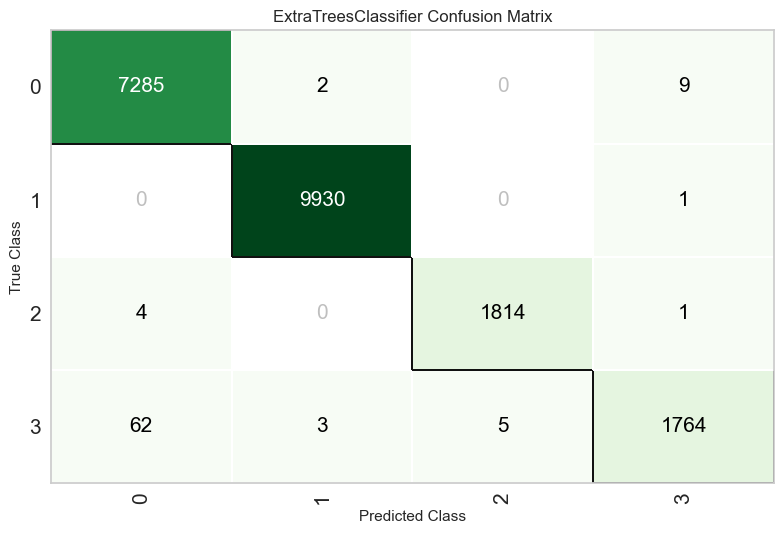

In [50]:
plot_model(best_final_model, plot="confusion_matrix")
# ile wartości z oryginalnego zbioru danych (True Class) algorytm zmienił na nową wartość po analizie(Predicted Class)
# np. 7 wartości oryginalnych o ocenie 1 zostało zmienionych na 0

## Confusion Matrix (Macierz pomyłek)

Confusion Matrix to tabela, która przedstawia liczbę poprawnych i niepoprawnych klasyfikacji dla każdej klasy. Ułatwia analizę, gdzie model popełnia błędy.

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| Actual Positive | True Positive (TP)  | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN)  |
 
Analiza macierzy pomyłek pozwala zrozumieć, które klasy są mylone przez model oraz jaki jest balans między różnymi rodzajami błędów.

<span style="color:red">Idealny model miałby same wartości na przekątnej (TP i TN) oraz zera poza nią.</span>

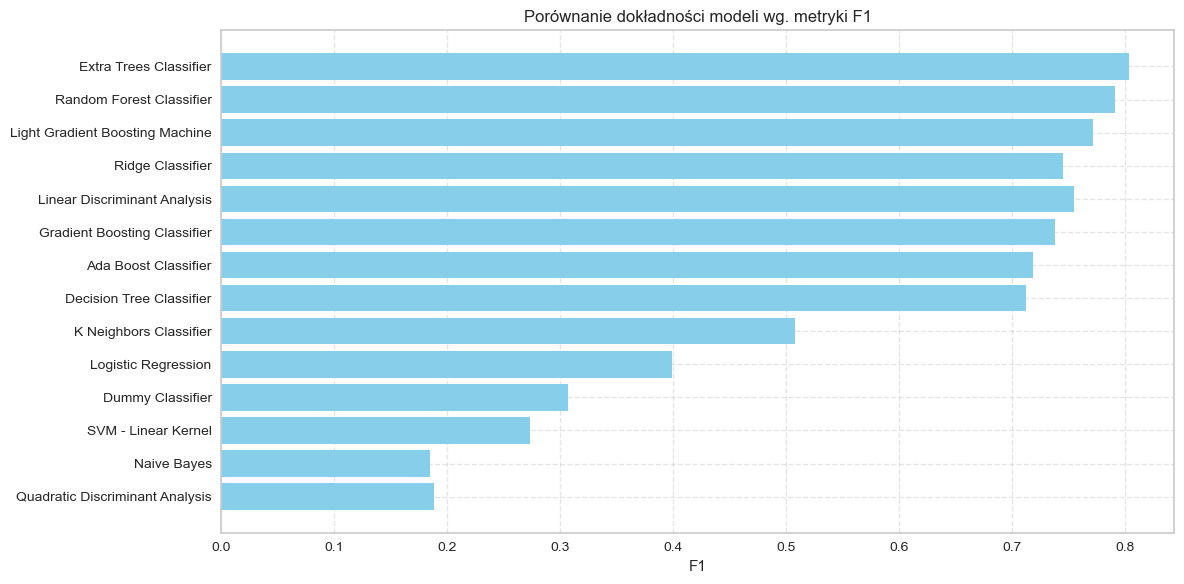

In [51]:
plt.figure(figsize=(12, 6))
plt.barh(unbalanced_metrics_df['Model'], unbalanced_metrics_df['F1'], color='skyblue')
plt.xlabel('F1')
plt.title('Porównanie dokładności modeli wg. metryki F1')
plt.gca().invert_yaxis()  # najlepszy model na górze
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [52]:
best_final_model.get_params()

{'memory': Memory(location=None),
 'steps': [('label_encoding',
   TransformerWrapperWithInverse(exclude=None, include=None,
                                 transformer=LabelEncoder())),
  ('date_feature_extractor',
   TransformerWrapper(exclude=None, include=['BuiltYear'],
                      transformer=ExtractDateTimeFeatures(features=['day', 'month',
                                                                    'year']))),
  ('numerical_imputer',
   TransformerWrapper(exclude=None,
                      include=['SaleId', 'Area', 'Price', 'NumberOfRooms', 'Floor',
                               'Floors', '00', '000', '01', '03', '04', '10', '11',
                               '12', '13', '14', '15', '16', '17', '18', '20',
                               '2024', '2025', '2026', '21', '22', '23', '25',
                               '26', '27', ...],
                      transformer=SimpleImputer(add_indicator=False, copy=True,
                                             

In [53]:
predicted_column = predictions['prediction_label']
print(predicted_column)

32451      FOR_RENOVATION
29003     DEVELOPER_STATE
48217    AFTER_RENOVATION
71146    AFTER_RENOVATION
53672     DEVELOPER_STATE
               ...       
60558     DEVELOPER_STATE
28728      FOR_RENOVATION
6015      DEVELOPER_STATE
25022     DEVELOPER_STATE
59764     DEVELOPER_STATE
Name: prediction_label, Length: 20880, dtype: object


In [54]:
df_last=predictions[['prediction_label','BuildingCondition', ]]

In [55]:
#df_last = df_last.reset_index()  
#print(df_last.columns) 

In [56]:
#df_last.rename(columns={'index': 'SaleId'}, inplace=True)

In [57]:
df_last.to_csv('sale_2024_stan.csv')

In [58]:
from pycaret.classification import load_model, predict_model

In [59]:
best_final_model = load_model("0_best_buildingCond_model")

Transformation Pipeline and Model Successfully Loaded


In [63]:
df_last

,prediction_label,BuildingCondition
32451,FOR_RENOVATION,FOR_RENOVATION
29003,DEVELOPER_STATE,DEVELOPER_STATE
48217,AFTER_RENOVATION,AFTER_RENOVATION
71146,AFTER_RENOVATION,AFTER_RENOVATION
53672,DEVELOPER_STATE,DEVELOPER_STATE
...,...,...
60558,DEVELOPER_STATE,DEVELOPER_STATE
28728,FOR_RENOVATION,FOR_RENOVATION
6015,DEVELOPER_STATE,DEVELOPER_STATE
25022,DEVELOPER_STATE,DEVELOPER_STATE


In [122]:
# 1. Wczytaj dane
df_raw = pd.read_csv("sale_2024_16.csv")

# 2. Zrób tymczasową kopię do predykcji — z placeholderami
df_predict = df_raw.copy()
df_predict["BuildingCondition"] = df_predict["BuildingCondition"].fillna(" ")

In [123]:
df_predict['BuiltYear'] = pd.to_datetime(df_predict['BuiltYear'], format='%Y', errors='coerce')

In [124]:
df_predict[['Title', 'Description']] = df_predict[['Title', 'Description']].fillna('')

In [83]:
# 3. Setup z text_features (ważne!)
exp = setup(
    data=df_predict,
    target='BuildingCondition',
    session_id=1123,
    categorical_features=['BuildingType', 'Location'],
    text_features=['Title', 'Description'],
    text_features_method='bow',
    keep_features=['SaleId'],
    date_features=['BuiltYear'],
    ordinal_features={
        'BuildingType': ['Pozostałe', 'Blok', 'Apartametowiec', 'Kamienica']
    },
    verbose=False
)

In [125]:
# 1. Wyciągnij kolumny, które model zna
expected_cols = model.feature_names_in_

#  Napraw BuiltYear
df_raw['BuiltYear'] = pd.to_datetime(df_raw['BuiltYear'], errors='coerce')

# 2. Funkcja dopasowująca df_raw
def align_dataframe(df_raw, expected_cols):
    # Usuń 'BuildingCondition' z listy expected_cols
    expected_cols = [col for col in expected_cols if col != 'BuildingCondition']

    # Dodaj brakujące kolumny
    for col in expected_cols:
        if col not in df_raw.columns:
            df_raw[col] = 0  # albo NaN

    # Usuń BuildingCondition jeśli jest
    if 'BuildingCondition' in df_raw.columns:
        df_raw = df_raw.drop(columns=['BuildingCondition'])
    
    # Ustaw kolejność kolumn
    df_aligned = df_raw[expected_cols]

    return df_aligned

# 3. Użycie
df_aligned = align_dataframe(df_raw, expected_cols)

# 4. Predykcja
predictions = predict_model(model, data=df_aligned)

In [126]:
result = df_aligned.copy()
result['Prediction_State'] = predictions['prediction_label']

# 5. Wyświetl
print(result)

        SaleId   Area     Price  NumberOfRooms                     BuiltYear  \
0        83983  80.00  760000.0            3.0                           NaT   
1        85099  48.00  260000.0            2.0                           NaT   
2        85987  56.00  720000.0            3.0                           NaT   
3        87630  64.00  180000.0            2.0                           NaT   
4        88880  46.65  320000.0            2.0 1970-01-01 00:00:00.000002024   
...        ...    ...       ...            ...                           ...   
12987  4417782  43.90  520000.0            2.0 1970-01-01 00:00:00.000002002   
12988  4418029  67.00  455000.0            3.0 1970-01-01 00:00:00.000002019   
12989  4418038  82.00  820000.0            3.0                           NaT   
12990  4418076  34.00  510000.0            2.0 1970-01-01 00:00:00.000002022   
12991  4418099  60.00  290000.0            3.0                           NaT   

          BuildingType  Floor  Floors  

In [131]:
# 1. Skopiuj oryginalne dane
final_result = df_raw.copy()

# 2. Usuń starą kolumnę BuildingCondition
if 'BuildingCondition' in final_result.columns:
    final_result = final_result.drop(columns=['BuildingCondition'])

# 3. Dodaj nową kolumnę z predykcją
final_result['Predicted_State'] = predictions['prediction_label']

# 4. Wyświetl efekt
final_result

,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,...,łazienka,łazienki,łodzi,łódź,łączy,śródmieście,świetna,świetnej,życia,Predicted_State
0,83983,NaN,11,"Mieszkanie, Opole, Pasieka, 80 m²","Mieszkanie, Opole, Pasieka, 80 m² Ogłoszenioda...",80.00,760000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,AFTER_RENOVATION
1,85099,NaN,19,NOWA CENA!!!Sprzedam mieszkanie 47.5m2 2 pokoje,Sprzedam mieszkanie 47.5 M2 w Kędzierzyn-Koźle...,48.00,260000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,AFTER_RENOVATION
2,85987,NaN,19,"Apartament Nova Ozimska 57m, 3 pokoje, klima",Sprzedam apartament zlokalizowany na osiedlu N...,56.00,720000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,AFTER_RENOVATION
3,87630,NaN,14,Mieszkanie dwupokojowe na sprzedaż,Na sprzedaż bezczynszowe mieszkanie o pow. 64 ...,64.00,180000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,DEVELOPER_STATE
4,88880,NaN,3,"Armii Krajowej 8A - mieszkanie 2 pokoje - 46, ...",Sprzedam mieszkanie w budynku mieszkalnym wiel...,46.65,320000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,AFTER_RENOVATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,4417782,NaN,3,Przytulne mieszkanie z dużym tarasem,Przedstawiam ofertę sprzedaży wyjątkowo ciepłe...,43.90,520000.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,DEVELOPER_STATE
12988,4418029,NaN,32,"Sprzedam mieszkanie 67,17 m Namysłów","Sprzedam mieszkanie o powierzchni 67,17 m w no...",67.00,455000.0,429500.0,491000.00,NaN,...,0,0,0,0,0,0,0,0,0,DEVELOPER_STATE
12989,4418038,NaN,4,3-pokojowe mieszkanie na sprzedaż,82 m² | 3 pokoje | Taras 20 m² | Garaż + 2 mie...,82.00,820000.0,839000.0,899000.00,NaN,...,0,0,0,0,0,0,0,0,0,DEVELOPER_STATE
12990,4418076,NaN,3,Mieszkanie z gwarancją dochodu| 2 pokoje| nowe...,"Na sprzedaż 2-pokojowe, w pełni wyposażone mie...",34.00,510000.0,377500.0,505000.00,NaN,...,0,0,0,0,0,0,0,0,0,AFTER_RENOVATION


In [133]:
# 1. Wczytaj dane z pliku
df_raw = pd.read_csv("sale_2024_16.csv")

# 2. Dodaj kolumnę z predykcją do oryginalnego df_raw
df_raw['Predicted_State'] = predictions['prediction_label']

# 3. Wyświetl efekt
df_raw

,SaleId,OriginalId,PortalId,Title,Description,Area,Price,OfferPrice,RealPriceAfterRenovation,OriginalPrice,...,Location,VoivodeshipNumber,CountyNumber,CommunityNumber,KindNumber,RegionNumber,SubRegionNumber,StreetNumber,EncryptedId,Predicted_State
0,83983,NaN,11,"Mieszkanie, Opole, Pasieka, 80 m²","Mieszkanie, Opole, Pasieka, 80 m² Ogłoszenioda...",80.00,760000.0,NaN,NaN,NaN,...,"Opolskie, Opole",16,61,5.0,4.0,952232.0,NaN,9374.0,VFO80lZz2LDUKsePgyP7qr1cwColzIKnjrh_K5zWcDs=,AFTER_RENOVATION
1,85099,NaN,19,NOWA CENA!!!Sprzedam mieszkanie 47.5m2 2 pokoje,Sprzedam mieszkanie 47.5 M2 w Kędzierzyn-Koźle...,48.00,260000.0,NaN,NaN,NaN,...,"Opolskie, Kędzierzyńsko-kozielski, Kędzierzyn-...",16,3,1.0,1.0,965424.0,NaN,NaN,QYoMxlbcVyS4lZYH557rur1cwColzIKnjrh_K5zWcDs=,AFTER_RENOVATION
2,85987,NaN,19,"Apartament Nova Ozimska 57m, 3 pokoje, klima",Sprzedam apartament zlokalizowany na osiedlu N...,56.00,720000.0,NaN,NaN,NaN,...,"Opolskie, Opole",16,61,1.0,1.0,965016.0,NaN,NaN,P5ugr2wcPhvZNpwHYJ5Pv71cwColzIKnjrh_K5zWcDs=,AFTER_RENOVATION
3,87630,NaN,14,Mieszkanie dwupokojowe na sprzedaż,Na sprzedaż bezczynszowe mieszkanie o pow. 64 ...,64.00,180000.0,NaN,NaN,NaN,...,"Opolskie, Namysłowski, Namysłów",16,6,2.0,4.0,965743.0,NaN,NaN,LcAizCdUeIZxyuZbnUAkar1cwColzIKnjrh_K5zWcDs=,DEVELOPER_STATE
4,88880,NaN,3,"Armii Krajowej 8A - mieszkanie 2 pokoje - 46, ...",Sprzedam mieszkanie w budynku mieszkalnym wiel...,46.65,320000.0,NaN,NaN,NaN,...,"Opolskie, Brzeski, Brzeg",16,1,1.0,1.0,965252.0,NaN,NaN,Z8_2vWdAHXs5NpdBDIQ9WL1cwColzIKnjrh_K5zWcDs=,AFTER_RENOVATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,4417782,NaN,3,Przytulne mieszkanie z dużym tarasem,Przedstawiam ofertę sprzedaży wyjątkowo ciepłe...,43.90,520000.0,NaN,NaN,NaN,...,"Opolskie, Opole, Gosławice, Ul. Krzemieniecka",16,61,1.0,1.0,965051.0,NaN,10099.0,aZpC4_JMV3__QDZaDhLbXqi_rC3KFy_RnfS0EWfIRU4=,DEVELOPER_STATE
12988,4418029,NaN,32,"Sprzedam mieszkanie 67,17 m Namysłów","Sprzedam mieszkanie o powierzchni 67,17 m w no...",67.00,455000.0,429500.0,491000.00,NaN,...,"Opolskie, Namysłowski, Namysłów",16,6,2.0,4.0,NaN,NaN,NaN,FiLEXYFRQ_ebc4br8lpc6-bQxVp1jDeL4EC2z-A_Xv4=,DEVELOPER_STATE
12989,4418038,NaN,4,3-pokojowe mieszkanie na sprzedaż,82 m² | 3 pokoje | Taras 20 m² | Garaż + 2 mie...,82.00,820000.0,839000.0,899000.00,NaN,...,"Opolskie, Opole, Chmielowice",16,61,1.0,1.0,496774.0,NaN,NaN,FiLEXYFRQ_ebc4br8lpc6z4_dpxrDGt-7ptnSFX67Aw=,DEVELOPER_STATE
12990,4418076,NaN,3,Mieszkanie z gwarancją dochodu| 2 pokoje| nowe...,"Na sprzedaż 2-pokojowe, w pełni wyposażone mie...",34.00,510000.0,377500.0,505000.00,NaN,...,"Opolskie, Opole",16,61,NaN,NaN,NaN,NaN,NaN,FiLEXYFRQ_ebc4br8lpc62jzzGldvCsejqBZGAbYChc=,AFTER_RENOVATION


In [135]:
df_raw.to_csv('16_sale_2024_stan.csv')